# 텐서플로우(google)-산업용
* 이미지 관련 라이브러리
* keras를 이용해 코딩이 쉬움
* 순차적 sequentional, functional, class


# 파이토치(meta)-연구용
* 자연어 관련 라이브러리
* 허깅페이스, 랭체인
* class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data = data[['Survived', 'Pclass','Sex','Age', 'SibSp', 'Parch','Embarked' ]]
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [5]:
data['family']=data['SibSp']+data['Parch']
data.head()

/tmp/ipykernel_91599/771876603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['family']=data['SibSp']+data['Parch']


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0


In [6]:
data=data.drop(['SibSp', 'Parch'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


In [7]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [8]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Embarked  889 non-null    object 
 5   family    891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [10]:
data.head()


,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


In [11]:
data=pd.get_dummies(data, drop_first=True)
data.head()

,Survived,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,True,False,True
1,1,1,38.0,1,False,False,False
2,1,3,26.0,0,False,False,True
3,1,1,35.0,1,False,False,True
4,0,3,35.0,0,True,False,True


In [12]:
X=data.drop('Survived', axis=1)
y=data['Survived']

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.059160,0.737695,-0.307562,0.619306
1,-1.566107,0.638789,0.059160,-1.355574,-0.307562,-1.614710
2,0.827377,-0.284663,-0.560975,-1.355574,-0.307562,0.619306
3,-1.566107,0.407926,0.059160,-1.355574,-0.307562,0.619306
4,0.827377,0.407926,-0.560975,0.737695,-0.307562,0.619306


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size=0.7 , random_state=10)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [18]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       386
           1       0.80      0.67      0.73       238

    accuracy                           0.81       624
   macro avg       0.81      0.78      0.79       624
weighted avg       0.81      0.81      0.81       624



In [19]:
# for i in range(1,20):
#    dtc = DecisionTreeClassifier(max_depth=i, random_state=10)
#    dtc.fit(X_train, y_train)
#    pred = dtc.predict(X_test)
#    print(i)
#    print(classification_report(y_test,pred))

# Tensorflow Sequential API를 사용한 순차적 모델

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-09-09 15:21:33.959218: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 15:21:35.942996: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-09 15:21:35.943130: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-09 15:21:35.948480: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-09 15:21:36.148771: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


# 딥러닝 신경망 모델 정의

#### 신경망 만들고, 파라미터 만들고,  훈련하고

In [21]:
X_train.shape

(267, 6)

# 신경망 모델 정의

In [22]:

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) # 입력층, input_dim: 독립변수의 컬럼 수
model.add(Dense(64, activation='relu')) #은닉층 1
model.add(Dense(32, activation='relu')) #은닉층 2
model.add(Dense(16, activation='relu')) #은닉층 3
model.add(Dense(1, activation='sigmoid')) #출력층, 이진분류: sigmoid



2024-09-09 15:21:36.508608: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-09 15:21:36.510344: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-09 15:21:36.624322: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:21:36.624374: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-09 15:21:36.624400: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

# 모델 파라미터 세팅 model.compile()
* loss: 오차 계산 지표
    * 이진분류: binary_crossentropy
    * 다중분류: categorical_crossentropy
    * 데이터에 0이 많은 희소행렬인 경우: sparse_categorical_crossentropy
    * 연속형데이터(회귀분석): MSE
* optimizer: learning_rate
    * adam 을 가장 많이 사용
    
* metrics
    

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


# 모델 훈련
* epochs: 전체 데이터를 한 번 훈련 하는 주기
* batch_size: 전체 데이터를 쪼개서 훈련, 메모리에 맞춰서 크기 조절
* validation_data:  검증 데이터로 모델 검증실시

In [24]:
history = model.fit(X_train, y_train, epochs = 200, batch_size=40, validation_data=(X_test,y_test))

Epoch 1/200
7/7 [==============================] - ETA: 0s - loss: 0.6623 - accuracy: 0.6330

2024-09-09 15:21:37.263470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:21:37.331870: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:21:37.331934: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


7/7 [==============================] - 1s 73ms/step - loss: 0.6623 - accuracy: 0.6330 - val_loss: 0.6517 - val_accuracy: 0.7356
Epoch 2/200
5/7 [====================>.........] - ETA: 0s - loss: 0.6197 - accuracy: 0.7650

2024-09-09 15:21:37.711245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:21:37.740790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:21:37.740848: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


7/7 [==============================] - 0s 27ms/step - loss: 0.6189 - accuracy: 0.7528 - val_loss: 0.6228 - val_accuracy: 0.7596
Epoch 3/200
7/7 [==============================] - 0s 25ms/step - loss: 0.5792 - accuracy: 0.7978 - val_loss: 0.5907 - val_accuracy: 0.7772
Epoch 4/200
7/7 [==============================] - 0s 24ms/step - loss: 0.5375 - accuracy: 0.8202 - val_loss: 0.5583 - val_accuracy: 0.7853
Epoch 5/200
7/7 [==============================] - 0s 25ms/step - loss: 0.4982 - accuracy: 0.8240 - val_loss: 0.5265 - val_accuracy: 0.7901
Epoch 6/200
7/7 [==============================] - 0s 24ms/step - loss: 0.4617 - accuracy: 0.8240 - val_loss: 0.5042 - val_accuracy: 0.7869
Epoch 7/200
7/7 [==============================] - 0s 22ms/step - loss: 0.4357 - accuracy: 0.8352 - val_loss: 0.4912 - val_accuracy: 0.7821
Epoch 8/200
7/7 [==============================] - 0s 25ms/step - loss: 0.4154 - accuracy: 0.8315 - val_loss: 0.4868 - val_accuracy: 0.7837
Epoch 9/200
7/7 [===============

7/7 [==============================] - 0s 25ms/step - loss: 0.3008 - accuracy: 0.8764 - val_loss: 0.5264 - val_accuracy: 0.8013
Epoch 61/200
7/7 [==============================] - 0s 25ms/step - loss: 0.2982 - accuracy: 0.8839 - val_loss: 0.5267 - val_accuracy: 0.8045
Epoch 62/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2972 - accuracy: 0.8801 - val_loss: 0.5258 - val_accuracy: 0.8077
Epoch 63/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2966 - accuracy: 0.8839 - val_loss: 0.5251 - val_accuracy: 0.8061
Epoch 64/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2951 - accuracy: 0.8801 - val_loss: 0.5337 - val_accuracy: 0.8029
Epoch 65/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2936 - accuracy: 0.8839 - val_loss: 0.5316 - val_accuracy: 0.8077
Epoch 66/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2960 - accuracy: 0.8764 - val_loss: 0.5338 - val_accuracy: 0.8013
Epoch 67/200
7/7 [========

7/7 [==============================] - 0s 24ms/step - loss: 0.2546 - accuracy: 0.8989 - val_loss: 0.6493 - val_accuracy: 0.7949
Epoch 119/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2540 - accuracy: 0.8951 - val_loss: 0.6513 - val_accuracy: 0.7869
Epoch 120/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2550 - accuracy: 0.8876 - val_loss: 0.6598 - val_accuracy: 0.7885
Epoch 121/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2547 - accuracy: 0.8951 - val_loss: 0.6562 - val_accuracy: 0.7949
Epoch 122/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2532 - accuracy: 0.8914 - val_loss: 0.6590 - val_accuracy: 0.7837
Epoch 123/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2550 - accuracy: 0.8989 - val_loss: 0.6656 - val_accuracy: 0.7869
Epoch 124/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2506 - accuracy: 0.8914 - val_loss: 0.6766 - val_accuracy: 0.7949
Epoch 125/200
7/7 [=

Epoch 176/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2287 - accuracy: 0.8989 - val_loss: 0.8205 - val_accuracy: 0.7853
Epoch 177/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2277 - accuracy: 0.9026 - val_loss: 0.8490 - val_accuracy: 0.7837
Epoch 178/200
7/7 [==============================] - 0s 26ms/step - loss: 0.2266 - accuracy: 0.9026 - val_loss: 0.8333 - val_accuracy: 0.7756
Epoch 179/200
7/7 [==============================] - 0s 25ms/step - loss: 0.2275 - accuracy: 0.9064 - val_loss: 0.8382 - val_accuracy: 0.7772
Epoch 180/200
7/7 [==============================] - 0s 23ms/step - loss: 0.2283 - accuracy: 0.8989 - val_loss: 0.8558 - val_accuracy: 0.7869
Epoch 181/200
7/7 [==============================] - 0s 24ms/step - loss: 0.2227 - accuracy: 0.8951 - val_loss: 0.8521 - val_accuracy: 0.7756
Epoch 182/200
7/7 [==============================] - 0s 25ms/step - loss: 0.2216 - accuracy: 0.9026 - val_loss: 0.8494 - val_accuracy: 0.7821
Epoch 

# 딥러닝 모델 성능 평가
* 딥러닝에서 모델의 성능을 평가하는 지표는 주로 loss. loss를 최소화하도록 하는것을 찾는다
* 보통 loss가 낮으면 accuracy가 올라기지만 비례하지 않을 때도 있음.
* 두 지표간에 차이가 있을 경우 loss가 낮은 모델이 우수한 모델


In [25]:
score = model.evaluate(X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

20/20 [==============================] - 0s 6ms/step - loss: 0.9132 - accuracy: 0.7644
test loss 0.9132197499275208
test accuracy 0.7644230723381042


# 딥러닝 학습결과 시각화

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

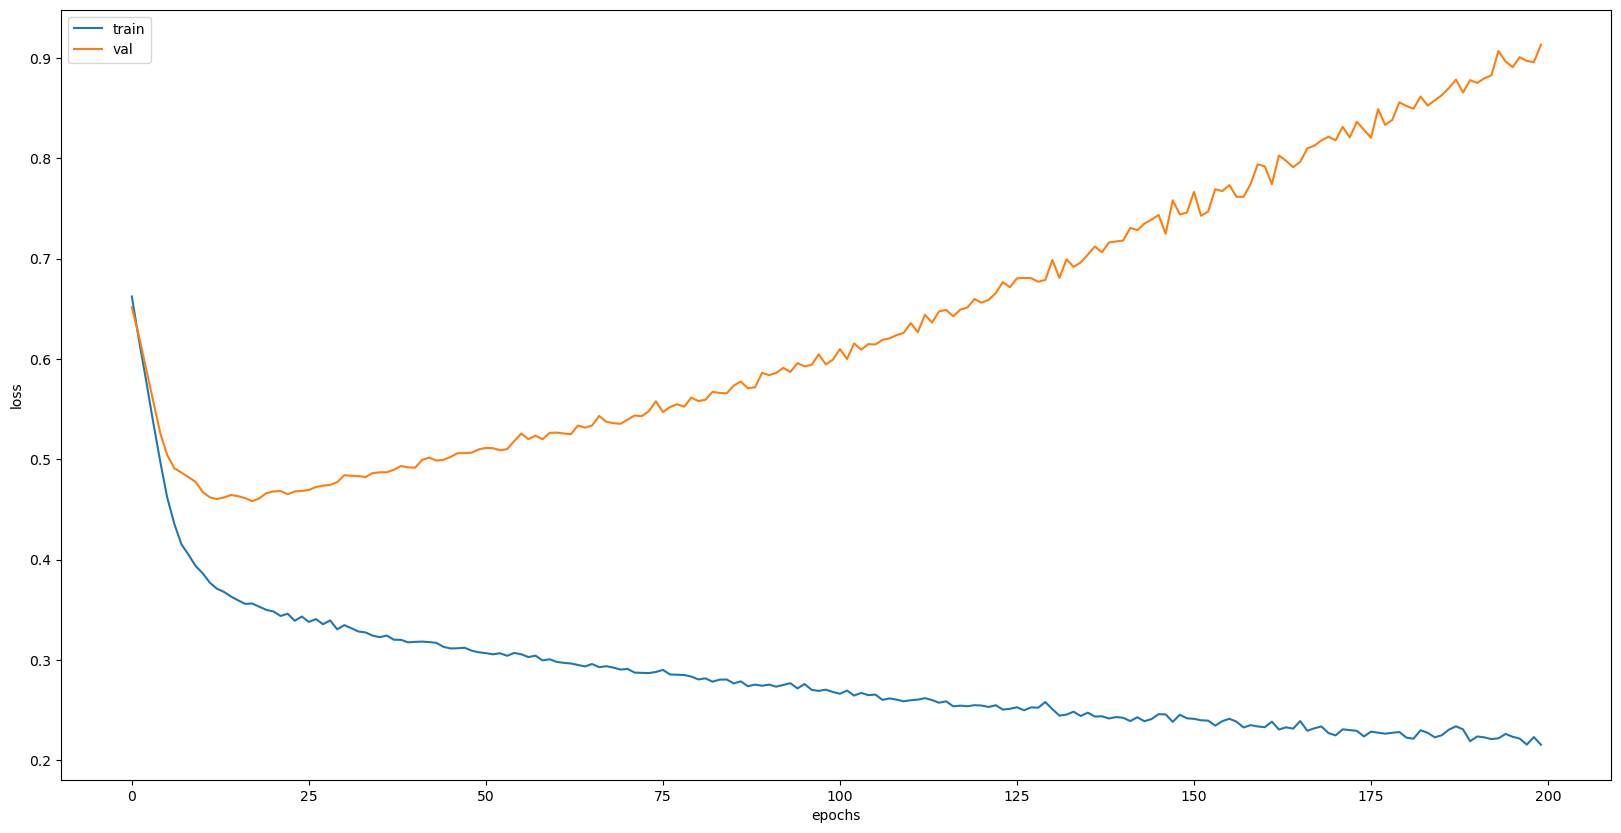

In [27]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [28]:
pred = model.predict(X_test)
pred

20/20 [==============================] - 0s 3ms/step


2024-09-09 15:22:11.152161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:22:11.232587: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:22:11.232650: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-09 15:22:11.242364: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:22:11.242428: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

array([[7.93013349e-02],
       [1.59636110e-01],
       [9.32478905e-02],
       [9.99998927e-01],
       [9.99947429e-01],
       [2.68586308e-01],
       [9.28558186e-02],
       [3.44384722e-02],
       [9.80426222e-02],
       [7.79038817e-02],
       [8.61945003e-03],
       [9.99961615e-01],
       [1.85447514e-01],
       [2.80048132e-01],
       [8.03615712e-03],
       [8.29358213e-03],
       [5.73192116e-09],
       [9.56569552e-01],
       [4.54923838e-01],
       [2.24076822e-01],
       [2.33536176e-02],
       [5.21733239e-02],
       [9.88242328e-01],
       [1.27759473e-02],
       [9.99822438e-01],
       [1.59636110e-01],
       [1.59636110e-01],
       [9.97843504e-01],
       [3.43129598e-02],
       [9.99998689e-01],
       [9.99947429e-01],
       [8.29358213e-03],
       [6.38552368e-01],
       [1.26074953e-03],
       [9.99966025e-01],
       [9.57650393e-02],
       [4.00953829e-01],
       [8.67918792e-10],
       [9.62588489e-02],
       [9.80426222e-02],


In [29]:
pred=pd.DataFrame(pred)
pred

,0
0,0.079301
1,0.159636
2,0.093248
3,0.999999
4,0.999947
...,...
619,0.093815
620,0.999986
621,0.012569
622,0.255752


In [30]:
pred = pred[0].apply(lambda x: 1 if x>0.7 else 0)
pred

0      0
1      0
2      0
3      1
4      1
      ..
619    0
620    1
621    0
622    0
623    0
Name: 0, Length: 624, dtype: int64

In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       386
           1       0.77      0.64      0.70       238

    accuracy                           0.79       624
   macro avg       0.78      0.76      0.77       624
weighted avg       0.79      0.79      0.79       624



# Tensorflow Functional API를 이용한 함수형 모델
* Sequential API는 단순히 층을 여러 개 쌓는 형태라 복잡한 모델 생성에 한계가 있어
* Functional API는 입력층과 출력층을 사용자가 직접 정의 가능
* 다중입력(Multi-input), 다중출력(Multi-ouput)등 복잡한 모델을 정의 할 수 있음
* Input(shpae=(독립변수 수))로 입력층 정의
* 이전 층을 다음 층의 입력으로 사용
* model()에 입력과 출력 정의

In [32]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [33]:
inputs = Input(shape=(X_train.shape[1],)) #입력층 정의 Input(shpae=(독립변수 수,))
x = Dense(32, activation='relu')(inputs) #은닉층 1번
x = Dense(64, activation='relu')(x) #은닉층 2번
x = Dense(32, activation='relu')(x) #은닉층 3번
x = Dense(16, activation='relu')(x) #은닉층 4번
x = Dense(1, activation='sigmoid')(x) #출력층
model = Model(inputs, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_5 (Dense)             (None, 32)                224       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable par

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=400, batch_size=100, validation_data=(X_test, y_test))
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x : 1 if x > 0.5 else 0 )
print(classification_report(y_test, pred))

Epoch 1/400
1/3 [=========>....................] - ETA: 0s - loss: 0.7313 - accuracy: 0.3600

2024-09-09 15:22:49.359772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:22:49.429781: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:22:49.429845: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 1s 104ms/step - loss: 0.7149 - accuracy: 0.4307 - val_loss: 0.6985 - val_accuracy: 0.5112
Epoch 2/400
3/3 [==============================] - 0s 39ms/step - loss: 0.6876 - accuracy: 0.6067 - val_loss: 0.6750 - val_accuracy: 0.6619
Epoch 3/400
1/3 [=========>....................] - ETA: 0s - loss: 0.6716 - accuracy: 0.6600

2024-09-09 15:22:49.601568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:22:49.631369: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:22:49.631429: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


3/3 [==============================] - 0s 42ms/step - loss: 0.6621 - accuracy: 0.7116 - val_loss: 0.6555 - val_accuracy: 0.7484
Epoch 4/400
3/3 [==============================] - 0s 39ms/step - loss: 0.6432 - accuracy: 0.8090 - val_loss: 0.6383 - val_accuracy: 0.7917
Epoch 5/400
3/3 [==============================] - 0s 47ms/step - loss: 0.6256 - accuracy: 0.8315 - val_loss: 0.6220 - val_accuracy: 0.7869
Epoch 6/400
3/3 [==============================] - 0s 40ms/step - loss: 0.6081 - accuracy: 0.7940 - val_loss: 0.6050 - val_accuracy: 0.7788
Epoch 7/400
3/3 [==============================] - 0s 41ms/step - loss: 0.5898 - accuracy: 0.7940 - val_loss: 0.5874 - val_accuracy: 0.7933
Epoch 8/400
3/3 [==============================] - 0s 38ms/step - loss: 0.5690 - accuracy: 0.7978 - val_loss: 0.5686 - val_accuracy: 0.7933
Epoch 9/400
3/3 [==============================] - 0s 64ms/step - loss: 0.5477 - accuracy: 0.8127 - val_loss: 0.5486 - val_accuracy: 0.7885
Epoch 10/400
3/3 [==============

3/3 [==============================] - 0s 42ms/step - loss: 0.3233 - accuracy: 0.8764 - val_loss: 0.4746 - val_accuracy: 0.8093
Epoch 62/400
3/3 [==============================] - 0s 38ms/step - loss: 0.3227 - accuracy: 0.8801 - val_loss: 0.4747 - val_accuracy: 0.8093
Epoch 63/400
3/3 [==============================] - 0s 40ms/step - loss: 0.3198 - accuracy: 0.8801 - val_loss: 0.4767 - val_accuracy: 0.8077
Epoch 64/400
3/3 [==============================] - 0s 36ms/step - loss: 0.3196 - accuracy: 0.8689 - val_loss: 0.4789 - val_accuracy: 0.8061
Epoch 65/400
3/3 [==============================] - 0s 43ms/step - loss: 0.3208 - accuracy: 0.8652 - val_loss: 0.4781 - val_accuracy: 0.8077
Epoch 66/400
3/3 [==============================] - 0s 44ms/step - loss: 0.3182 - accuracy: 0.8689 - val_loss: 0.4781 - val_accuracy: 0.8077
Epoch 67/400
3/3 [==============================] - 0s 38ms/step - loss: 0.3164 - accuracy: 0.8764 - val_loss: 0.4788 - val_accuracy: 0.8093
Epoch 68/400
3/3 [========

3/3 [==============================] - 0s 36ms/step - loss: 0.2848 - accuracy: 0.8839 - val_loss: 0.5390 - val_accuracy: 0.7949
Epoch 120/400
3/3 [==============================] - 0s 38ms/step - loss: 0.2847 - accuracy: 0.8839 - val_loss: 0.5413 - val_accuracy: 0.7949
Epoch 121/400
3/3 [==============================] - 0s 39ms/step - loss: 0.2822 - accuracy: 0.8914 - val_loss: 0.5449 - val_accuracy: 0.7981
Epoch 122/400
3/3 [==============================] - 0s 38ms/step - loss: 0.2824 - accuracy: 0.8839 - val_loss: 0.5472 - val_accuracy: 0.7965
Epoch 123/400
3/3 [==============================] - 0s 37ms/step - loss: 0.2843 - accuracy: 0.8801 - val_loss: 0.5504 - val_accuracy: 0.7997
Epoch 124/400
3/3 [==============================] - 0s 36ms/step - loss: 0.2840 - accuracy: 0.8876 - val_loss: 0.5545 - val_accuracy: 0.7981
Epoch 125/400
3/3 [==============================] - 0s 36ms/step - loss: 0.2809 - accuracy: 0.8876 - val_loss: 0.5551 - val_accuracy: 0.7965
Epoch 126/400
3/3 [=

Epoch 177/400
3/3 [==============================] - 0s 40ms/step - loss: 0.2506 - accuracy: 0.8989 - val_loss: 0.6398 - val_accuracy: 0.7917
Epoch 178/400
3/3 [==============================] - 0s 38ms/step - loss: 0.2514 - accuracy: 0.8989 - val_loss: 0.6372 - val_accuracy: 0.7933
Epoch 179/400
3/3 [==============================] - 0s 39ms/step - loss: 0.2497 - accuracy: 0.9026 - val_loss: 0.6391 - val_accuracy: 0.7933
Epoch 180/400
3/3 [==============================] - 0s 41ms/step - loss: 0.2497 - accuracy: 0.9026 - val_loss: 0.6385 - val_accuracy: 0.7933
Epoch 181/400
3/3 [==============================] - 0s 39ms/step - loss: 0.2510 - accuracy: 0.9064 - val_loss: 0.6397 - val_accuracy: 0.7949
Epoch 182/400
3/3 [==============================] - 0s 40ms/step - loss: 0.2496 - accuracy: 0.9026 - val_loss: 0.6478 - val_accuracy: 0.7997
Epoch 183/400
3/3 [==============================] - 0s 41ms/step - loss: 0.2488 - accuracy: 0.9026 - val_loss: 0.6496 - val_accuracy: 0.7965
Epoch 

Epoch 235/400
3/3 [==============================] - 0s 40ms/step - loss: 0.2340 - accuracy: 0.9064 - val_loss: 0.7439 - val_accuracy: 0.7933
Epoch 236/400
3/3 [==============================] - 0s 39ms/step - loss: 0.2241 - accuracy: 0.9026 - val_loss: 0.7510 - val_accuracy: 0.7997
Epoch 237/400
3/3 [==============================] - 0s 41ms/step - loss: 0.2275 - accuracy: 0.9064 - val_loss: 0.7537 - val_accuracy: 0.7981
Epoch 238/400
3/3 [==============================] - 0s 41ms/step - loss: 0.2272 - accuracy: 0.9064 - val_loss: 0.7503 - val_accuracy: 0.7949
Epoch 239/400
3/3 [==============================] - 0s 42ms/step - loss: 0.2338 - accuracy: 0.8989 - val_loss: 0.7586 - val_accuracy: 0.7981
Epoch 240/400
3/3 [==============================] - 0s 39ms/step - loss: 0.2340 - accuracy: 0.8951 - val_loss: 0.7707 - val_accuracy: 0.7981
Epoch 241/400
3/3 [==============================] - 0s 41ms/step - loss: 0.2317 - accuracy: 0.9064 - val_loss: 0.7638 - val_accuracy: 0.7949
Epoch 

Epoch 293/400
3/3 [==============================] - 0s 39ms/step - loss: 0.2035 - accuracy: 0.9213 - val_loss: 0.8829 - val_accuracy: 0.7965
Epoch 294/400
3/3 [==============================] - 0s 38ms/step - loss: 0.2096 - accuracy: 0.9139 - val_loss: 0.8882 - val_accuracy: 0.7965
Epoch 295/400
3/3 [==============================] - 0s 44ms/step - loss: 0.2113 - accuracy: 0.9101 - val_loss: 0.8929 - val_accuracy: 0.7901
Epoch 296/400
3/3 [==============================] - 0s 42ms/step - loss: 0.2074 - accuracy: 0.9101 - val_loss: 0.8991 - val_accuracy: 0.7965
Epoch 297/400
3/3 [==============================] - 0s 46ms/step - loss: 0.2051 - accuracy: 0.9139 - val_loss: 0.8953 - val_accuracy: 0.7901
Epoch 298/400
3/3 [==============================] - 0s 42ms/step - loss: 0.2046 - accuracy: 0.9101 - val_loss: 0.8905 - val_accuracy: 0.7901
Epoch 299/400
3/3 [==============================] - 0s 41ms/step - loss: 0.2014 - accuracy: 0.9101 - val_loss: 0.9014 - val_accuracy: 0.7949
Epoch 

Epoch 351/400
3/3 [==============================] - 0s 37ms/step - loss: 0.1899 - accuracy: 0.9251 - val_loss: 1.0476 - val_accuracy: 0.7853
Epoch 352/400
3/3 [==============================] - 0s 42ms/step - loss: 0.1901 - accuracy: 0.9213 - val_loss: 1.0579 - val_accuracy: 0.7869
Epoch 353/400
3/3 [==============================] - 0s 46ms/step - loss: 0.1871 - accuracy: 0.9213 - val_loss: 1.0777 - val_accuracy: 0.7837
Epoch 354/400
3/3 [==============================] - 0s 39ms/step - loss: 0.1869 - accuracy: 0.9326 - val_loss: 1.0613 - val_accuracy: 0.7901
Epoch 355/400
3/3 [==============================] - 0s 38ms/step - loss: 0.1892 - accuracy: 0.9176 - val_loss: 1.0669 - val_accuracy: 0.7933
Epoch 356/400
3/3 [==============================] - 0s 37ms/step - loss: 0.1890 - accuracy: 0.9251 - val_loss: 1.0630 - val_accuracy: 0.7917
Epoch 357/400
3/3 [==============================] - 0s 40ms/step - loss: 0.1976 - accuracy: 0.9176 - val_loss: 1.0679 - val_accuracy: 0.7917
Epoch 

2024-09-09 15:23:28.942612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


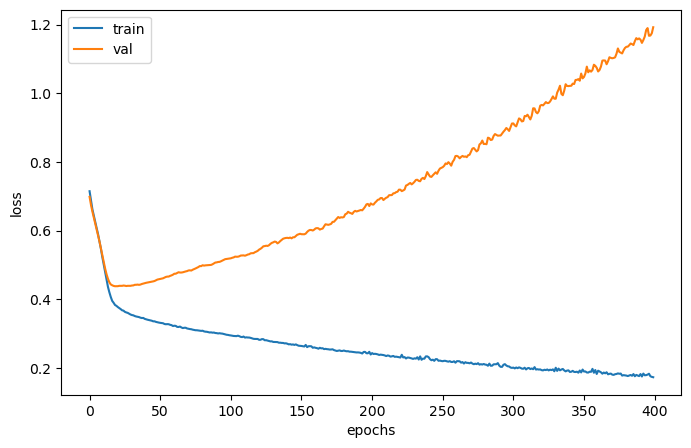

In [36]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# Model Subclassing API로 모델 만들기
* class 형태의 모델 정의 방법
* tf.keras.Model을 상속받아 작성

In [37]:
class Titanic(tf.keras.Model):
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(16, activation='relu')
        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

In [38]:
model = Titanic()

In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=500, validation_data=(X_test,y_test))
pred=model.predict(X_test)
pred=pd.DataFrame(pred)
pred=pred[0].apply(lambda x: 1 if x > 5 else 0)
print(classification_report(y_test, pred))

Epoch 1/200


2024-09-09 15:47:47.168756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:47:47.231201: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:47:47.231265: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 867ms/step - loss: 0.6946 - accuracy: 0.5918 - val_loss: 0.6786 - val_accuracy: 0.6330
Epoch 2/200
1/1 [==============================] - 0s 55ms/step - loss: 0.6854 - accuracy: 0.6030 - val_loss: 0.6718 - val_accuracy: 0.6378
Epoch 3/200
1/1 [==============================] - 0s 60ms/step - loss: 0.6768 - accuracy: 0.6217 - val_loss: 0.6654 - val_accuracy: 0.6378
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 0.6686 - accuracy: 0.6217

2024-09-09 15:47:47.624198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-09 15:47:47.649951: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 15:47:47.650010: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 60ms/step - loss: 0.6686 - accuracy: 0.6217 - val_loss: 0.6594 - val_accuracy: 0.6394
Epoch 5/200
1/1 [==============================] - 0s 56ms/step - loss: 0.6610 - accuracy: 0.6217 - val_loss: 0.6539 - val_accuracy: 0.6394
Epoch 6/200
1/1 [==============================] - 0s 59ms/step - loss: 0.6540 - accuracy: 0.6255 - val_loss: 0.6485 - val_accuracy: 0.6442
Epoch 7/200
1/1 [==============================] - 0s 60ms/step - loss: 0.6472 - accuracy: 0.6292 - val_loss: 0.6433 - val_accuracy: 0.6442
Epoch 8/200
1/1 [==============================] - 0s 55ms/step - loss: 0.6406 - accuracy: 0.6292 - val_loss: 0.6383 - val_accuracy: 0.6490
Epoch 9/200
1/1 [==============================] - 0s 57ms/step - loss: 0.6344 - accuracy: 0.6292 - val_loss: 0.6334 - val_accuracy: 0.6522
Epoch 10/200
1/1 [==============================] - 0s 51ms/step - loss: 0.6282 - accuracy: 0.6404 - val_loss: 0.6286 - val_accuracy: 0.6554
Epoch 11/200
1/1 [=============

1/1 [==============================] - 0s 58ms/step - loss: 0.4263 - accuracy: 0.8240 - val_loss: 0.4858 - val_accuracy: 0.7901
Epoch 63/200
1/1 [==============================] - 0s 53ms/step - loss: 0.4238 - accuracy: 0.8277 - val_loss: 0.4842 - val_accuracy: 0.7901
Epoch 64/200
1/1 [==============================] - 0s 66ms/step - loss: 0.4213 - accuracy: 0.8277 - val_loss: 0.4826 - val_accuracy: 0.7901
Epoch 65/200
1/1 [==============================] - 0s 55ms/step - loss: 0.4189 - accuracy: 0.8277 - val_loss: 0.4810 - val_accuracy: 0.7901
Epoch 66/200
1/1 [==============================] - 0s 53ms/step - loss: 0.4164 - accuracy: 0.8315 - val_loss: 0.4795 - val_accuracy: 0.7901
Epoch 67/200
1/1 [==============================] - 0s 59ms/step - loss: 0.4140 - accuracy: 0.8315 - val_loss: 0.4779 - val_accuracy: 0.7917
Epoch 68/200
1/1 [==============================] - 0s 66ms/step - loss: 0.4116 - accuracy: 0.8315 - val_loss: 0.4764 - val_accuracy: 0.7933
Epoch 69/200
1/1 [========

1/1 [==============================] - 0s 60ms/step - loss: 0.3322 - accuracy: 0.8689 - val_loss: 0.4509 - val_accuracy: 0.8077
Epoch 121/200
1/1 [==============================] - 0s 52ms/step - loss: 0.3315 - accuracy: 0.8652 - val_loss: 0.4514 - val_accuracy: 0.8061
Epoch 122/200
1/1 [==============================] - 0s 55ms/step - loss: 0.3307 - accuracy: 0.8652 - val_loss: 0.4519 - val_accuracy: 0.8061
Epoch 123/200
1/1 [==============================] - 0s 58ms/step - loss: 0.3299 - accuracy: 0.8652 - val_loss: 0.4525 - val_accuracy: 0.8029
Epoch 124/200
1/1 [==============================] - 0s 92ms/step - loss: 0.3292 - accuracy: 0.8652 - val_loss: 0.4530 - val_accuracy: 0.8045
Epoch 125/200
1/1 [==============================] - 0s 65ms/step - loss: 0.3284 - accuracy: 0.8652 - val_loss: 0.4535 - val_accuracy: 0.8045
Epoch 126/200
1/1 [==============================] - 0s 56ms/step - loss: 0.3277 - accuracy: 0.8652 - val_loss: 0.4540 - val_accuracy: 0.8045
Epoch 127/200
1/1 [=

Epoch 178/200
1/1 [==============================] - 0s 53ms/step - loss: 0.2957 - accuracy: 0.8801 - val_loss: 0.4996 - val_accuracy: 0.7981
Epoch 179/200
1/1 [==============================] - 0s 56ms/step - loss: 0.2951 - accuracy: 0.8801 - val_loss: 0.5008 - val_accuracy: 0.7965
Epoch 180/200
1/1 [==============================] - 0s 52ms/step - loss: 0.2946 - accuracy: 0.8801 - val_loss: 0.5020 - val_accuracy: 0.7965
Epoch 181/200
1/1 [==============================] - 0s 53ms/step - loss: 0.2941 - accuracy: 0.8801 - val_loss: 0.5032 - val_accuracy: 0.7965
Epoch 182/200
1/1 [==============================] - 0s 48ms/step - loss: 0.2936 - accuracy: 0.8801 - val_loss: 0.5044 - val_accuracy: 0.7965
Epoch 183/200
1/1 [==============================] - 0s 50ms/step - loss: 0.2931 - accuracy: 0.8801 - val_loss: 0.5054 - val_accuracy: 0.7981
Epoch 184/200
1/1 [==============================] - 0s 55ms/step - loss: 0.2926 - accuracy: 0.8801 - val_loss: 0.5064 - val_accuracy: 0.7981
Epoch 

2024-09-09 15:48:00.055077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

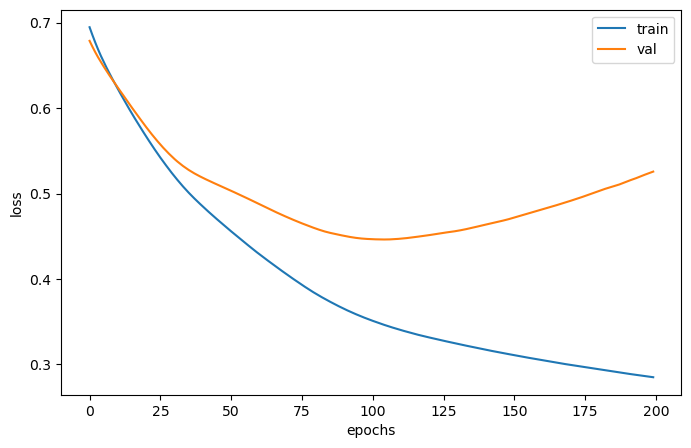

In [41]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()